In [1]:
%matplotlib notebook

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
import IPython
import IPython.display
import IPython.core.display
from os.path import join, exists
from os import makedirs

output_dir = '../../outf/HW2-4'
if not exists(output_dir):
    makedirs(output_dir)

In [2]:
def make_animation(plotx, E, xl=(0, 1), yl=(0, 1), inter=25, display=False):
    '''
    takes a graph and motion of vertexes in 2D and returns an animation
    E: list of edges (each edge is a pair of vertexes)
    plotx: a matrix of states ordered as (x1, y1, x2, y2, ..., xn, yn) in the rows and time in columns
    xl and yl define the display boundaries of the graph
    inter is the interval between each point in ms
    '''
    fig = mpl.figure.Figure()
    mpl.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=xl, ylim=yl)
    ax.grid()

    list_of_lines = []
    for i in E: #add as many lines as there are edges
        line, = ax.plot([], [], 'o-', lw=2)
        list_of_lines.append(line)

    def animate(i):
        for e in range(len(E)):
            vx1 = plotx[2*(E[e][0]-1),i]
            vy1 = plotx[2*(E[e][0]-1)+1,i]
            vx2 = plotx[2*(E[e][1]-1),i]
            vy2 = plotx[2*(E[e][1]-1)+1,i]
            list_of_lines[e].set_data([vx1,vx2],[vy1,vy2])
        return list_of_lines

    def init():
        return animate(0)

    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=inter, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    if(display==True):
        IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))
    return ani

In [3]:
class SecondOrderControl:
    def __init__(self, G, poses, zref, time=10, dt=0.01, k=0.5):
        self.G = G
        self.zref = zref
        self.time = time
        self.dt = dt
        self.k = k
        self.N = G.number_of_nodes()

        self.T = int(time / dt)
        self.u = np.zeros((self.T, self.N, 2))
        self.x = np.zeros((self.T, self.N, 2))
        self.x[0] = poses

        self.L = nx.laplacian_matrix(G).toarray()
        self.D = nx.incidence_matrix(G, oriented=True).toarray()

    def draw_initial_conditions(self):
        pos = {}
        plt.figure()
        for i, position in enumerate(self.x[0]):
            pos[i+1] = position
        pos_shadow = {key: (value[0] + 0.005, value[1] + 0.005) for key, value in pos.items()}
        nx.draw(self.G, pos_shadow, with_labels=False, node_size=600, node_color='none', edgecolors='gray', edge_color='gray', width=3.0, alpha=0.5)

        nx.draw(self.G, pos, with_labels=True, node_size=600, edge_color='red', width=2.0, linewidths=3.0, edgecolors='black', node_color='white', font_size=12, font_weight='bold')
        plt.title('Initial Conditions')
        plt.show()

    def run_simulation(self):
        for t in range(1, self.T):
            self.u[t - 1] = -self.k * self.L @ self.x[t - 1] + self.k * self.D @ self.zref
            self.x[t] = self.x[t - 1] + self.u[t - 1] * self.dt

    def plot_results(self, filename=None, display=True):
        E = list(self.G.edges())
        X = np.zeros((2 * self.N, self.T))
        for i in range(self.T):
            for j in range(self.N):
                X[2 * j, i] = self.x[i, j, 0]
                X[2 * j + 1, i] = self.x[i, j, 1]

        ani = make_animation(X, E, xl=(0, 5), yl=(0, 5), inter=10, display=display)
        if filename:
            writervideo = animation.FFMpegWriter(fps=20, codec='h264', extra_args=['-pix_fmt', 'yuv420p'])
            ani.save(filename, writer=writervideo)

        return ani

## Incomplete Graph

<IPython.core.display.Javascript object>


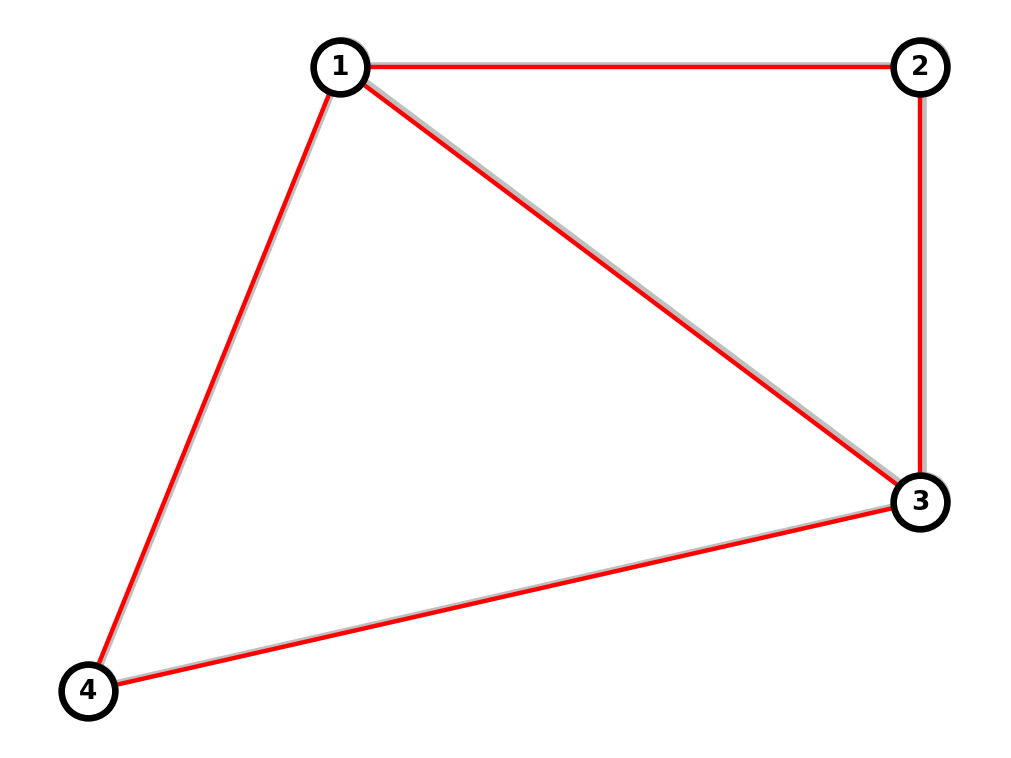

In [9]:
N = 4
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4), (3, 4)])
a=7/2-np.sqrt(7/8)
poses=np.array([[3,4],[4,4],[4,3],[a,a]])
zref = np.array([[1, 1],[1, 1], [np.sqrt(2), np.sqrt(2)], [1.5, 1.5],  [1.5, 1.5]])

control = SecondOrderControl(G, poses,zref)
control.draw_initial_conditions()

## Simulation under Random Initial Condition

In [6]:
poses_random=np.random.uniform(0,5,(N, 2))
control = SecondOrderControl(G, poses_random,zref)
control.run_simulation()
control.plot_results(filename=join(output_dir,'simulations_animation.gif'))

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQABbVhtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
FQhliIQAX/7yK/ApnClWwXcE/95SqYYGRT65kWsYAAADAAADAHOgAAGIgGDvjULyCXAE9UpXBtOz
nCf4b+TIII5zGeQ6Vde1Je7JXqR5aVbEHSOyPD+IFN9YngppAF8nZKkEtadfygeFHhUXLZMIexMA
7KOvXTKDsT3oUehhX1FUp593//QnUzeMhGVh2s1AQx3Rk4ZOle2SwN81gZWOWXqdPazdGTuJEbUA
qbEUfsOYTYiqHYKCBzjtRKEEAmRaRRXz5/8gRHex/Gnd8ADsPPQv2ED/JC7UGXQgaxFV8U9tTU3s
M2SQALm7oE/DYB3Wuw3/XKsbID4GoQtmVmfgryyuv3he1doexgwEx0nuzL0XMcIZcQbxqo/MNAT9
eKVmf250DJgmEsgD3Gkp/uW2KDi7rspkBK0fqFnl7Wmn+uUJnFX5JUOoFZXuCqvKtBPEBZmY1Fmw
NtPne+kFhVE98YX1nw26925naQVbFuZSC6okemzW5MKqd5b23LSu3oAyt7HuY4c6bU3gdz5UyXGp
i7qBMWmKOxmRcwm5/9QpUHXVAZxO6KY/5s6DaJ+S5IqjO4O3kCu0Jyn3Tsy4ePnqy/DWjMWqBU51
zsmmZBZqwLNYAeA8js/FXPjsLodMJinnS++X0ml7Fke/ej75xXJ55nuzrvs1gR+UC7GCTnHfOnJq
b8YmxlaUJbTbqkSb252UNT3IDHW/YygLHvhBl+nXRFJXt2OmkEe3KSEn8raD+a3RPfgd6uQO2Dpz
MLKX1VKeWpVEgtJvjbAluM93tti4JntFFWpE4kiTyz12W96l3brOQDQuMSMb50eUu13WGZ8pMBuR
5063MNTPiYnA6pPy3dPGwDQKP59Qr6bGVrt8OVZKuWvYTYPI8Fmljz1CFOhO4TutFaGmtAblF/ti
Gw1BkvnNfOZy4Ma8lcvc4IypQHcYV63g2l9PWRdO0VSZAKBG8O3nuSqOu0RomWuj03+kzAS0Lah/
5gkpzcGfigw2W1jEhTYj75InpmNIKSvJNWXLYTM099CXVMHDdDhtCyoj/78Yep2E/vxa7ltNq9/q
9wbropEyXs08gV28W3qwUZN7d8Us/iJjaTdQoAAqc5KoM3RMO5Yh1E1QhhIzh5JSGciSYAAJw4ip
mwo2R18S/npsLQoX5TqEjcxOE2TTY3drAiBLbx0dh/JcLjuUaYW2iNHBVnmEAdwD5ZF+Hjha2qG6
ed3NnPvCKuY5zXJ/fiYmFeEm+mzr5jcHKPHrvLwyrHzIXURqRe5/UqYEAnw75YPcuN7EeoBeJvaR
GGhaV/L6RKu4rxFMxjw1n4taLLhEIn4bYC3Mj4LbYr2iGtzZmTgOKZImZLtz3tkWpN8IUheZp2Cv
3Y9A6F9MmHsTL3od3cLdKuaBQCvERIWIO4gaQpzAc5x0kpsp9ovoLVdyljT6z7TbVbCrcA9kxMSI
Yn4WfYH7K4ulx3nIsnPXtFuoGOEwzJLI8t2JoQl1Kim4RLmiDUvnpPd9LCtBZ5lwvmnsx97O+e7a
Wav3GqlU5/rBcAMJ0F5tasgqMXDlcjEN6SIese3KKIudvcTCfwcq6jsuas3MCWFcNgwaKXzLomY0
Hvkc8UlAElig7usKIUsrz9i99fFie070bMLEvhn+K0l0v34JcpBf+tDzuQ1yXIdDiD5CzK3dFRHl
Lj8A5qyHtz2w9lf7ZH+AGA3AoPXqVpUkvXLvuP2WftDtwsHwOSWbrTJx75B4Op4EoMV5MgkQedR5
hEs1Mt8OJBFF1pnp667exhScsYDo9lVzYKTJ0YlXFmG0VKobzQqykNjc4s74KCs+/DGaD14XfLDU
rB7MmAHFcX5lwmI1586JcU/3r/c3ZMX7GnGgvGRrArKhPFBGj5w5JYwkK0drO4eICIj3rxgyvMkZ
iola3YBP+okHu8fHSeHSRmieF1LuQks93qwB7fLUMPgJ02pe6n7pfPk8rCxpJ7MPS8RcmHwhqb7O
7JFVBLSUxpAhkqipKxGKO+nAyEMsAprHtA84+qym3Sb4nqDAwtU1mpI0ZEfk8sugsfoibtLK12nB
TErQDnM6APFzrt8jdRooUbl8FS5pIyAEinpOkPdrpzuIbVNDBHRJiPuPDM0crJLwef7D6KeQBBSD
oTpt8UWxP0HOiposb3TLAIi06gq8sB2HmOtLmqrXoqbxnYYbJczQrt+Nr1ybgCluFozVZpr3SqWn
s5kKvpuqstlVS7VTVMEEo7h4Tq7kYvP3JEerYWdQ72rG7djps9yQEiLp+/HInwB4xsxx/w8cSPTL
EeFhsysr6uwS2GPAbCG6jJyO8obB5n0yvMWNTdlWRQp5UZ9hbnhkXBc/BnIZ3073AK0J8wFb2Rqb
bw5nxlmHW2ksSYj2qd/QVwqWUwyeBLsU/HukOSC7ti17tb7T96HhxGzyDw0cOlEc5y+4XMUV30//
vvCKG39dUMv/5Ue5P2AJSOYrIZiwlsYxAvGcDOP4HD5XeyzLArRUcpuYccYVqOv8rVc3y+F78uqb
d/6cNJ/eNh+pNSNOGeypK7A51trq/oe7lx28Yn04EEZhn3dExuOjpe/oM3O0V9MuNiDTgdPYLG3e
7Qzx5VDTDmPXa2Nnir3WyTsn/E9+E3vAkkGKvTOY6gQA+uT3hQ3EaEDnIPN2LSXyiMRqR1lvHTD5
81eMDffZbiv1PFWAay84DfATWhcKtYsFs9zuOD0pRi/n+vYJwCVAVxe0juDviaTaibxDg+Zy5ErW
O+XXBQQC37IgVhSI7kmLOPB5PssAFhE1NSOALyROGxftww8PPNhWBpWsZcpcCMOwAEwD+8gs6yc1
yfsVewQQYRbx+3m3S7nOnonRoCTcUSfpcEjFMxnfizAKfvMUGExEPMZbBR9m0BA2xbWZQUCGv34N
SwqRf22Jbv1a2opGDPDvk

## Complete graph

<IPython.core.display.Javascript object>


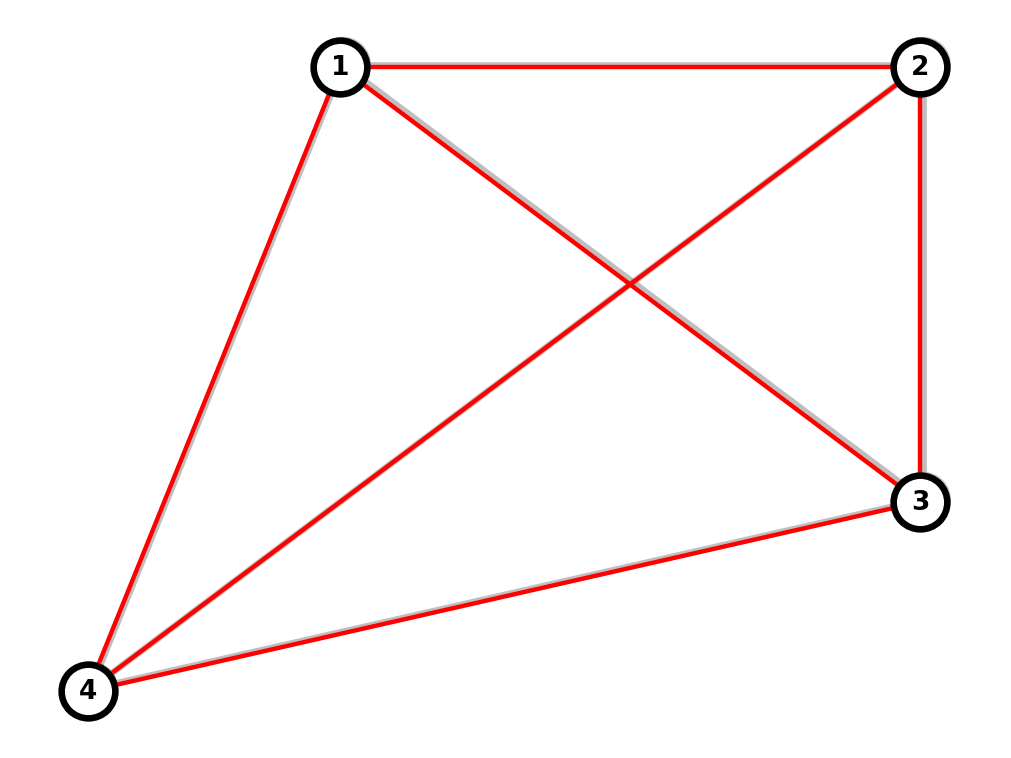

In [10]:
N = 4
G_new = nx.Graph()
G_new.add_nodes_from([1, 2, 3, 4])
G_new.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
b=np.sqrt(7/4)+np.sqrt(1/2)
zref_new = np.array([[1, 1], [np.sqrt(2), np.sqrt(2)], [1.5, 1.5], [1, 1], [b, b], [1.5, 1.5]])
a=7/2-np.sqrt(7/8)
poses=np.array([[3,4],[4,4],[4,3],[a,a]])
control_new = SecondOrderControl(G_new,poses, zref_new)
control_new.draw_initial_conditions()

# Simulation under Random Initial Condition

In [7]:
control_new = SecondOrderControl(G_new,poses_random, zref_new)
control_new.run_simulation()
control_new.plot_results(filename=join(output_dir,'simulations_animation_complete.gif'))

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQABRqdtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
FnpliIQAX/7yK/ApnClWwXcE/95SqYYGRT65kWsYAAADAAADAHOgAAGIgGDvjULyCXAE9UpXBtOz
nCf4b+TIII5zGeQ6Vde1Je7JXqR5aVbEHSOyPD+IFN9YngppAF8nZKkEtadfygeFHhUXLZMIexMA
7KOvXTKDsT3oUehhX1FUp593//QnUzeMhGVh2s1AQx3Rk4ZOle2SwN81gZWOWXqdPazdGTuJEbUA
qbEUfsOYTYiqHYKCBzjtRKEEAmRaRRXz5/8gRHex/Gnd8ADsPPQv2ED/JC7UGXQgaxFV8U9tTU3s
M2SQALm7oE/DYB3Wuw3/XKsbID4GoQtmVmfgryyuv3he1doexgwEx0nuzL0XMcIZcQbxqo/Nb5nU
4/K64IPkO0NEUxn68ky8uPD/a78XwHosY7r0HH9cLuoJe/Qpq573tAMHOcdjTkLzwbwI5Q5nMS9e
ORjp479JUEGJGdNOQzDEsN5dHxNh5StOuyJaRXqQEYjtmR/Vq/Brn+t8DDM8pdkpPKIPnqTWYQyA
fLYZmPOarG1ivjuja3KEK4L21YyFvI+/2xwLnuTTtGL44kkW9p/fh6LmHJnnW1cUa9JiPKD9Hp9Y
OrtSdEpBkgpMIuhG8wqmxxgCYDdP6Md+JXsswObdwpGn0Kn0lqtzC2jUXZdnMHetOdv/Tx0tO9rs
ddFPOLJh7zmHNfGSnNx88kHMjdzeqoJhbrPKQ+hgc+DTNYxv9EqsxHGQP+BNK4vaD1LulloVSjai
go+dMYzln/sZJF4jjjpINwdVj6Ud0koKa8/x4u7bJGECDOyKnX/CWQdHRvrtV2vlA7RahOYkOAp4
IiWhi285mpMkKXnL9r3N+xMz5bXrH7AUYlR7T7XBKvv0LhApKsUh/l8R6F5KG9F91ZajVLapW/R3
3H7y4oO07bd8zEIqWypSTOjRLWrUx/Mhe2LvXS7xHUmNRGWG44Mi7Z4vy16jr5TIvgeJHzyS86bT
o/XIBAeax5kZwTRFykYNgJmRqxDaOz166Cru++aoUYMQfkJ06xbYM4l3AaIM5RgCwh6wfeVSbVmm
k9FJsywSpQuTXT5urswcfS+LeUHzlzLPYtVLSwRAakzHRwcUYBRZ8uxG85WTjVgVNNSgG7RPXHBy
hN6F7tOAA1v473x3V2ZePxQc3sYA6iJGblu4qfclPp5mnF4nEf5jMr9IPKb9AGh2vl2SzCIoZtvI
eUmA7PizCC0E4vsWjAwWEXHvMhTRYnR24Hx3oTTzQwBdAMxGkUJtuXGRAz6wY2pPmHV92ampFFFA
LCCfQ1b0S/WIwc3DuXw+uybkuZuqcGBmCZvn33z1Ob5ZMMAqfaPFPXcNsi6UlzO4EaY5czPHnxDm
N0y8i2z8aU3wc0gHDxRJeIBvHTHnx9E/JZZwDZUdVE3jOcwpg7A4U6cbRDPOPc/UP3qd/qW6a+GB
+NoHezCNYZrfx9D4HI6OYuz/lgh601MUAnrw/Kujd/zpVm9egTz4DgZlYPdJB+IIi0PqAN7P+Yv1
SUaL7C1fOFi4LHuRGadh5VtGbweT74u07p0c6sXcCDtYJootO8YibFnFmHNmP6y9ONa0XwzFeSRP
TM759kuOKAiRXlzEkp5f+tfV2Ol8MP/YiCMelt/COSW8TqPjmEy0+PkFNM6geAyJGmVIi/3R5NQB
rbpjbtRcEFP7IcGXNcUYMB8wFVIyF/IqmPYShjetumULj3UmdwNOmU1jS8T2G5sRxZHlHiNHKBTE
UczLw3z2Pz+Z/17i5TAMykTUwTP2HxeLao0qUZr8nn796kMFHskcifawqU4ZgV028fPOj+TgO98R
lJeeRBXB5bF+iMzN/xunwv8K3i2VZagtw1Ezwr2342+i8E3DGILTvVj5Cdkv1k5CfXtiSENqy3dz
mMeFzB7C6MG38kc66Sfq40IOr94kZVz7G4erieYjyCzQCOYatDpQlqrWzwA9AHK3vOxwHvjXuT9m
A09hMiH/NlXFWEcLC+3ERYeKx9iWgAjyNzXzjOcrvmK8UpV9lp2mV3llqXto9nOpG5CI/7dICMpS
tL+flxRFzHhmNkND7VhtqJiJ3eaFNdC41bQLzO12WRxpiEpneyIC1/s/jQzVmgEEngy0mr/R2zp2
SpyvaYJ45ZNs+KrdSRl5xeJl2/9EhLCpZNnS6clX9g6GbKwV7+qyYFq3FJ09j4WuS9XQaaKIgzcz
lqOdWRszN79YMhIcaDpvwAFkYpomnKByXsfdh+p+AUklExyoikU/VvooTMvHgvD1s2MF1aUcAAM6
wnKwYh+hEA9HPVMFAteSHCwxfZdJpNT5YscUknH8QreR4znplzWPTzVNQF67EzPxXTYMacIKakKk
r88j6FLuS4EYVNhcTc5b3XGRmConxHzkYlNi1THPPv0BLcX18enh8kTeIUtM+d4YZXsCWizjy+Il
AJR4UniBWdxo8HmlmeXeCAjfzu86omh8iXerpJ91ylhx70qoN5/ZFylTaw/kmgVZ4BwEqSZmjM6u
yqUSjtNdFbpcmwf/QNCthVVRYD8uuycer5Zmhg8qhqtLr5tBL7TLvAVghen2KBhBDFm0Fajhu3Sn
wtZh7z3T9sWZCxMw6ruqmRenGI9oKVf4yk9CEKpUPLsq+r9oIx647mgCTCspFHrptvf3K2kuSBF4
0Ml+fvnTWF3YZey+jjvAykd8ptJWqMaPfqoMMMEyMpBlSmKdFWc6YV5La/QIsB7J64NeWz2UChJ5
ei3b+Ud4yk5L3osO+rCjlKUW0/zoopQrmzkHba18LKNwTYuNLkXSxDBR5fkgzLy2P1wJQ0p08JKr
aILEh2wohsueMROGXzvR66OwjzITqYM8XyG/JGdTvKDh6gAC8sDpLnJhf+Xy9e7DVgFU3ofmP9Jl
NN1xfwFhJ00t0jpG5G2eO